<div style="background-color: #f8b195; padding: 5px;">
<h2 style="padding:0px 0px;"> Objective: Perform simple statistical analysis on data </h2>

In [5]:
%connect legion-demo

Password: ········


Success: 'legion-demo' connection established and activated for user 'artur-borycki_teradata', with default database 'legion-demo'


In [6]:
CREATE multiset FOREIGN TABLE WEATHER,
EXTERNAL SECURITY DEFINER TRUSTED auth1
(
      ID BIGINT,
      "Date" VARCHAR(1024),
      Loc VARCHAR(1024),    
      MinTemp FLOAT,
      MaxTemp FLOAT,
      Rainfall FLOAT,
      Evaporation FLOAT,
      Sunshine FLOAT,
      WindGustDir VARCHAR(1024),
      WindGustSpeed FLOAT,
      WindDir9am VARCHAR(1024),
      WindDir3pm VARCHAR(1024),
      WindSpeed9am FLOAT,
      WindSpeed3pm FLOAT,
      Humidity9am FLOAT,
      Humidity3pm FLOAT,
      Pressure9am FLOAT,
      Pressure3pm FLOAT,
      Cloud9am FLOAT,
      Cloud3pm FLOAT,
      Temp9am FLOAT,
      Temp3pm FLOAT,
      RainToday VARCHAR(1024),
      rainfalltomorrow FLOAT,
      RainTomorrow VARCHAR(1024)
)
USING
(
  LOCATION('/S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER1/')
  STOREDAS ('PARQUET')
)
NO PRIMARY INDEX
PARTITION BY COLUMN;

Success: 0 rows affected

In [2]:
drop foreign table weather;

Success: 44 rows affected

<h3 style="padding:0px 0px;">1.1.1 What are the top 3 features with most missing values</h3>

In [7]:
select ColumnName, NullCount, NullPercentage from TD_ColumnSummary (
  on weather as InputTable
  using
  TargetColumns ('[:]')
) as dt ORDER BY NullCount desc;

ColumnName NullCount NullPercentage 1 Sunshine 69834 48.00940471198069 2 Evaporation 62789 43.166115537711654 3 Cloud3pm 59358 40.80737527413223 4 Cloud9am 55888 38.42182333166047 5 Pressure9am 15065 10.356870320846424 6 Pressure3pm 15028 10.331433599846005 7 WindDir9am 10566 7.263902542984621 8 WindGustDir 10325 7.098220117008917 9 WindGustSpeed 10262 7.054908943413608 10 Humidity3pm 4507 3.0984676094294614 11 WindDir3pm 4228 2.90666098350738 12 Temp3pm 3609 2.4811115159598236 13 RainTomorrow 3266 2.2453062374964765 14 rainfalltomorrow 3261 2.2418688427666904 15 RainToday 3261 2.2418688427666904 16 Rainfall 3261 2.2418688427666904 17 WindSpeed3pm 3062 2.1050605325211915 18 Humidity9am 2654 1.8245691225706213 19 WindSpeed9am 1767 1.2147752975065138 20 Temp9am 1767 1.2147752975065138 21 MinTemp 1485 1.020906234746561 22 MaxTemp 1260 0.8662234719061729 23 Loc 0 0 24 Date 0 0 25 ID 0 0 26 Location 0 0

In [8]:
%chart x=ColumnName, y=NullPercentage, title="Features with Missing Values", labelx=Feature, labely=%Null

<h3 style="padding:0px 0px;">1.1.2 How many features have negative values in the dataset</h3>

In [8]:
select ColumnName, NegativeCount from TD_ColumnSummary (
  on weather as InputTable
  using
  TargetColumns ('[:]')
) as dt ORDER BY NegativeCount desc;

ColumnName NegativeCount 1 MinTemp 3464 2 Temp9am 443 3 Temp3pm 180 4 MaxTemp 113 5 Cloud3pm 0 6 Pressure3pm 0 7 Sunshine 0 8 ID 0 9 WindSpeed9am 0 10 Pressure9am 0 11 Evaporation 0 12 Cloud9am 0 13 WindSpeed3pm 0 14 Rainfall 0 15 Humidity9am 0 16 WindGustSpeed 0 17 rainfalltomorrow 0 18 Humidity3pm 0 19 RainTomorrow 20 Date 21 WindDir9am 22 WindGustDir 23 WindDir3pm 24 Loc 25 RainToday 26 Location

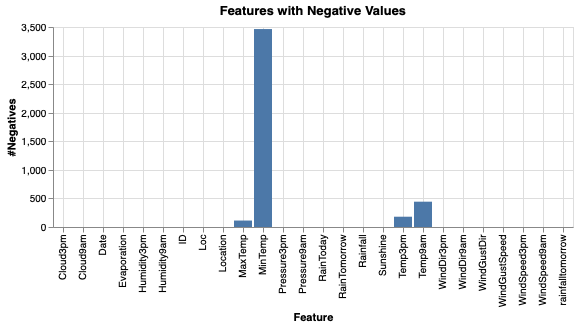

In [4]:
%chart x=ColumnName, y=NegativeCount, title="Features with Negative Values", labelx=Feature, labely=#Negatives

<h3 style="padding:0px 0px;">1.1.3 What is the count of rainy days versus non-rainy days</h3>

In [5]:
select * from TD_CategoricalSummary (
  on weather as InputTable
  using
    TargetColumns ('RainToday')
) as dt;

ColumnName DistinctValue DistinctValueCount 1 RainToday 3261 2 RainToday Yes 31880 3 RainToday No 110318

In [6]:
%chart x=DistinctValue, y=DistinctValueCount, title="Rainy days versus non-Rainy days", labelx=Category, labely=#Count

<h3 style="padding:0px 0px;">1.1.4 How many distinct categories are there for Location</h3>

In [7]:
select * from TD_CategoricalSummary (
  on weather as InputTable
  using
    TargetColumns ('Loc')
) as dt;

ColumnName DistinctValue DistinctValueCount 1 Loc Albany 3040 2 Loc AliceSprings 3040 3 Loc Adelaide 3193 4 Loc Cairns 3040 5 Loc Ballarat 3040 6 Loc Bendigo 3040 7 Loc Albury 3040 8 Loc Cobar 3009 9 Loc CoffsHarbour 3009 10 Loc Brisbane 3193 11 Loc BadgerysCreek 3009 12 Loc Dartmoor 3009 13 Loc Darwin 3193 14 Loc Canberra 3436 15 Loc GoldCoast 3040 16 Loc Launceston 3040 17 Loc Hobart 3193 18 Loc Katherine 1578 19 Loc Perth 3193 20 Loc MelbourneAirport 3009 21 Loc MountGinini 3040 22 Loc Melbourne 3193 23 Loc SalmonGums 3001 24 Loc Moree 3009 25 Loc Newcastle 3039 26 Loc Mildura 3009 27 Loc SydneyAirport 3009 28 Loc MountGambier 3040 29 Loc NorahHead 3004 30 Loc PerthAirport 3009 31 Loc Nhil 1578 32 Loc PearceRAAF 3009 33 Loc Townsville 3040 34 Loc NorfolkIsland 3009 35 Loc Penrith 3039 36 Loc Watsonia 3009 37 Loc Nuriootpa 3009 38 Loc Sale 3009 39 Loc Witchcliffe 3009 40 Loc Portland 3009 41 Loc WaggaWagga 3009 42 Loc Richmond 3009 43 Loc Walpole 3006 44 Loc Sydney 3344 45 Loc Wollongong 3040 46 Loc Tuggeranong 3039 47 Loc Woomera 3009 48 Loc Uluru 1577 49 Loc Williamtown 3009

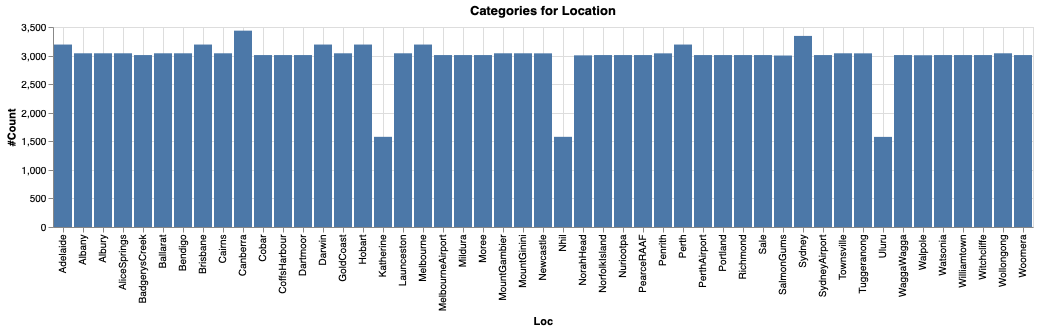

In [8]:
%chart x=DistinctValue, y=DistinctValueCount, title="Categories for Location", labelx=Loc, labely=#Count

<h3 style="padding:0px 0px;">1.1.5 What is the mean and standard deviation for MaxTemp? Does it follow normal distribution ? </h3>

In [9]:
select * from TD_UnivariateStatistics (
  on weather as InputTable
  using
  TargetColumns ('MaxTemp')
  Stats('MEAN','STD')
) as dt ORDER BY 1,2;

Attribute StatName StatValue 1 MaxTemp MEAN 23.221348275646864 2 MaxTemp STANDARD DEVIATION 7.119048845979228

In [29]:
select * from weather;

Location ID Date Loc MinTemp MaxTemp Rainfall Evaporation Sunshine WindGustDir WindGustSpeed WindDir9am WindDir3pm WindSpeed9am WindSpeed3pm Humidity9am Humidity3pm Pressure9am Pressure3pm Cloud9am Cloud3pm Temp9am Temp3pm RainToday rainfalltomorrow RainTomorrow 1 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 53590 2013-05-05 MountGinini -0.3 8.7 0 SSW 24 SSW WNW 11 9 25 62 4.9 7.8 No 0 No 2 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 2814 2016-11-11 Albury 7.7 26.9 0 E 24 ESE NNW 9 6 67 35 1011.9 1007.7 16 26.5 No 8 Yes 3 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 16762 2013-10-10 Newcastle 13.8 34.4 0 NW NW 9 46 34 15 0 0 23.5 33.8 No 0 No 4 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_3_1.parquet 137890 2014-02-20 AliceSprings 14.3 29.9 0 12 12.4 ESE 54 SE SSE 30 28 36 17 1013.2 1010.2 0 0 21.5 28.7 No 0 No 5 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 123881 2009-02-19 SalmonGums 5.7 27.4 0 SE 44 ESE ESE 19 19 69 34 18.3 25.5 No 0 No 6 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 8381 2015-08-18 Cobar 4 16.8 0 3 SSW 31 SE SW 7 11 69 37 1022.9 1021.2 0 1 10.7 16.5 No 0 No 7 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 11195 2015-02-04 CoffsHarbour 16.7 26.3 13.4 63 58 20.5 25.4 Yes 7.2 Yes 8 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_3_1.parquet 75715 2011-01-05 Portland 9.4 18.3 0 4.4 11.7 SE 35 SE ESE 15 15 63 56 1012.4 1012.5 8 4 14.8 17.4 No 0 No 9 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 33871 2009-12-17 SydneyAirport 22.2 32.6 5.6 10.4 11.6 NE 76 NE NE 11 44 58 53 1013.5 1007.8 0 5 28.7 28.9 Yes 4.8 Yes 10 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 16966 2014-05-02 Newcastle 12 21.5 0 NW 28 65 2 17 No 0 No 11 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 101205 2013-10-16 MountGambier 9.5 22.8 0 3.6 4.4 NW 67 N NNW 24 30 46 42 1003.4 999.8 8 8 14.7 20.8 No 5.6 Yes 12 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_3_1.parquet 53447 2012-10-15 MountGinini 2.3 15.2 0 NW 46 SW WSW 22 13 51 50 7.5 14.2 No 0 No 13 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 143600 2016-09-16 Katherine 26 36 0 8 ENE 50 N N 11 13 62 1013.8 1008.8 3 30 No 3.6 Yes 14 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 92824 2016-03-26 GoldCoast 20.3 29.3 0 SSE 43 NW NNE 13 28 59 64 1017.3 1014 26.6 27.8 No 0 No 15 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 75919 2011-08-27 Portland 6.5 15.1 0.4 2 8 W 43 NNW WNW 17 31 92 69 1021.2 1019 2 3 10.4 14.6 No 0 No 16 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_3_1.parquet 81282 2009-10-11 Dartmoor 6 22 0 3.8 8.7 N 54 ENE NNE 4 22 66 35 1018.4 1012.4 13.5 21.3 No 1.2 Yes 17 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 28304 2012-03-12 Richmond 18 27 0 ENE 0 19 81 57 1020.3 1019 20 25.7 No 0 No 18 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 61971 2011-02-28 Sale 15.7 21.2 11.8 1.6 0 S 24 SSE S 2 17 87 78 1010.1 1006.8 8 8 16.9 20 Yes 0.6 No 19 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 61767 2010-08-08 Sale -1.7 14.9 0.2 1.8 9 N 19 WNW N 7 2 91 42 1020.4 1017.2 1 1 3.6 14.2 No 0.2 No 20 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_3_1.parquet 8442 2015-10-18 Cobar 21.7 33.3 0 13.2 ESE 31 SSE E 9 9 40 24 1023.2 1020.7 7 6 24.5 31.9 No 0 No 21 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_0_1.parquet 19719 2013-08-20 NorahHead 7.9 15.9 0 WNW 39 W SW 9 13 47 28 1013.4 1012 11.6 15.4 No 22 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_1_1.parquet 47819 2014-03-09 Canberra 13.8 25.8 27 S 39 SSE NW 9 11 89 54 1023.4 1019.6 7 16.4 25.5 Yes 0.4 No 23 /S3/s3.amazonaws.com/tioce/UAF/PARQUET/WEATHER/object_33_2_1.parquet 56200 2012-01-02 Ballarat 17.2 37.4 0 N 57 N NW 30 31

In [10]:
%chart x=id, y=MaxTemp, title="MaxTemp Values", labelx=Day, labely=MaxTemp, mark=point, height=500, width=1400

ERROR: x column name 'id' is not a column in this result set 

In [8]:
select * from TD_QQNorm (
  on (select maxtemp, cast (row_number() over (order by maxtemp asc nulls last) as bigint) as rank_maxtemp from weather) as InputTable
  USING
  TargetColumns('maxtemp')
  RankColumns('rank_maxtemp')
) as dt;

MaxTemp MaxTemp_theoretical_quantiles 1 -4.8 -4.447876584154154 2 16 -1.0098946262606228 3 18.8 -0.545540554703035 4 21.1 -0.20440954185862892 5 -4.1 -4.238097546885452 6 16 -1.0098656560971657 7 18.8 -0.5455203669887128 8 21.1 -0.20439180669010493 9 -3.8 -4.12915767142671 10 16 -1.0098366867802162 11 18.8 -0.5455001794975858 12 21.1 -0.20437407158835685 13 -3.7 -4.054343756602522 14 16 -1.0098077183097 15 18.8 -0.5454799922296414 16 21.1 -0.20435633655337782 17 -3.2 -3.9970382476059365 18 16 -1.0097787506855445 19 18.8 -0.5454598051848658 20 21.1 -0.20433860158516226 21 -3.1 -3.950451782120414 22 16 -1.0097497839076746 23 18.8 -0.5454396183632462 24 21.1 -0.20432086668370486 25 -3.1 -3.911125526115889 26 16 -1.0097208179760173 27 18.8 -0.54541943176477 28 21.1 -0.20430313184899873 29 -3 -3.877052300913672 30 16 -1.0096918528904992 31 18.8 -0.5453992453894234 32 21.1 -0.20428539708103877 33 -2.9 -3.846961452486513 34 16 -1.0096628886510466 35 18.8 -0.5453790592371941 36 21.1 -0.20426766237981786 37 -2.7 -3.819996648359929 38 16 -1.0096339252575852 39 18.8 -0.5453588733080688 40 21.1 -0.20424992774533113 41 -2.5 -3.795552832803064 42 16 -1.009604962710042 43 18.8 -0.5453386876020336 44 21.1 -0.20423219317757235 45 -2.5 -3.7731863550135625 46 16 -1.0095760010083437 47 18.8 -0.5453185021190765 48 21.1 -0.20421445867653554 49 -2.4 -3.7525620571206604 50 16 -1.0095470401524156 51 18.8 -0.5452983168591841 52 21.1 -0.20419672424221447 53 -2.3 -3.733420444596471 54 16 -1.009518080142185 55 18.8 -0.5452781318223434 56 21.1 -0.20417898987460315 57 -2.2 -3.715556425777527 58 16 -1.009489120977578 59 18.8 -0.5452579470085415 60 21.1 -0.20416125557369624 61 -2.2 -3.6988050437940085 62 16 -1.009460162658521 63 18.8 -0.5452377624177649 64 21.1 -0.20414352133948688 65 -2.2 -3.683031607846123 66 16 -1.0094312051849403 67 18.8 -0.5452175780500006 68 21.1 -0.20412578717197039 69 -2.1 -3.6681246884132888 70 16 -1.0094022485567626 71 18.8 -0.5451973939052359 72 21.1 -0.20410805307113944 73 -2.1 -3.653991032401799 74 16 -1.0093732927739143 75 18.8 -0.5451772099834575 76 21.1 -0.20409031903698915 77 -2.1 -3.640551798696881 78 16 -1.009344337836322 79 18.8 -0.5451570262846528 80 21.1 -0.2040725850695131 81 -2.1 -3.6277397224099097 82 16 -1.009315383743912 83 18.8 -0.5451368428088077 84 21.1 -0.20405485116870503 85 -2 -3.615496945428411 86 16 -1.0092864304966103 87 18.8 -0.5451166595559103 88 21.1 -0.2040371173345592 89 -2 -3.603773333564302 90 16 -1.009257478094344 91 18.8 -0.545096476525947 92 21.1 -0.2040193835670705 93 -1.9 -3.5925251547646972 94 16 -1.0092285265370395 95 18.8 -0.5450762937189046 96 21.1 -0.20400164986623137 97 -1.9 -3.5817140291141536 98 16 -1.0091995758246237 99 18.8 -0.5450561111347707 100 21.1 -0.20398391623203782 101 -1.9 -3.5713060861147845 102 16 -1.009170625957022 103 18.8 -0.5450359287735314 104 21.1 -0.20396618266448208 105 -1.8 -3.561271281934478 106 16 -1.0091416769341617 107 18.8 -0.5450157466351742 108 21.1 -0.2039484491635588 109 -1.8 -3.5515828414626442 110 16 -1.0091127287559694 111 18.8 -0.5449955647196858 112 21.1 -0.20393071572926247 113 -1.7 -3.542216798719855 114 16 -1.009083781422371 115 18.8 -0.5449753830270536 116 21.1 -0.20391298236158684 117 -1.7 -3.5331516154929514 118 16 -1.0090548349332935 119 18.8 -0.5449552015572641 120 21.1 -0.20389524906052592 121 -1.7 -3.524367862719622 122 16 -1.0090258892886637 123 18.8 -0.5449350203103045 124 21.1 -0.20387751582607327 125 -1.7 -3.5158479526082913 126 16 -1.0089969444884075 127 18.8 -0.5449148392861618 128 21.1 -0.20385978265822402 129 -1.7 -3.507575912082683 130 16 -1.0089680005324522 131 18.8 -0.5448946584848224 132 21.1 -0.20384204955697127 133 -1.5 -3.499537190118007 134 16 -1.008939057420724 135 18.8 -0.5448744779062742 136 21.1 -0.20382431652230992 137 -1.5 -3.4917184930518452 138 16 -1.0089101151531499 139 18.8 -0.5448542975505033 140 21.1 -0.2038065835542333 141 -1.5 -3.4841076431251934 142 16 -1.0088811737296552 143 18.8 -0.5448341174174969 144 21.1 -0

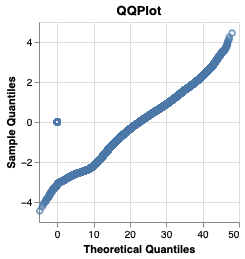

In [9]:
%chart x=MaxTemp, y=MaxTemp_theoretical_quantiles, title="QQPlot", labelx=Theoretical Quantiles, labely=Sample Quantiles, mark=point

In [27]:
select * from td_histogram (
  on weather as InputTable
  USING 
  MethodType ('Equal-width')
  TargetColumn ('MaxTemp')
  NBins(30)
) as dt;

ColumnName Label MinValue MaxValue CountOfValues Bin_Percent 1 MaxTemp 1 -3.0366666666666666 -1.2733333333333334 42 0.02912641557847142 2 MaxTemp 9 11.07 12.833333333333332 4122 2.8585496432014095 3 MaxTemp 4 2.253333333333333 4.016666666666667 233 0.1615822578519962 4 MaxTemp 0 -4.8 -3.0366666666666666 7 0.004854402596411903 5 MaxTemp 2 -1.2733333333333334 0.4899999999999993 118 0.08183135805380065 6 MaxTemp 10 12.833333333333332 14.596666666666664 7371 5.111685934021734 7 MaxTemp 7 7.543333333333332 9.306666666666665 558 0.38696523554254886 8 MaxTemp 6 5.7799999999999985 7.543333333333332 281 0.1948695899416778 9 MaxTemp 3 0.4899999999999993 2.253333333333333 134 0.09292713541702785 10 MaxTemp 11 14.596666666666664 16.359999999999996 10479 7.267040686828619 11 MaxTemp 12 16.359999999999996 18.12333333333333 12576 8.721281007496584 12 MaxTemp 14 19.886666666666663 21.65 13997 9.706724734568201 13 MaxTemp 5 4.016666666666667 5.7799999999999985 234 0.1622757439371979 14 MaxTemp 13 18.12333333333333 19.886666666666663 13240 9.181755768070515 15 MaxTemp 22 33.99333333333333 35.75666666666667 4333 3.004875207178968 16 MaxTemp 15 21.65 23.41333333333333 13068 9.062476161415821 17 MaxTemp 8 9.306666666666665 11.07 1493 1.0353747252061387 18 MaxTemp 16 23.41333333333333 25.176666666666662 11676 8.097143530815053 19 MaxTemp 27 42.81 44.57333333333333 252 0.1747584934708285 20 MaxTemp 19 28.70333333333333 30.466666666666665 8424 5.841926781739124 21 MaxTemp 18 26.939999999999998 28.70333333333333 9955 6.903653978182928 22 MaxTemp 17 25.176666666666662 26.939999999999998 11274 7.818362124563971 23 MaxTemp 21 32.23 33.99333333333333 6055 4.199058245896296 24 MaxTemp 20 30.466666666666665 32.23 7898 5.47715310092303 25 MaxTemp 28 44.57333333333333 46.336666666666666 55 0.038141734686093526 26 MaxTemp 23 35.75666666666667 37.519999999999996 2725 1.8897495821746337 27 MaxTemp 24 37.519999999999996 39.28333333333333 1752 1.214987621273379 28 MaxTemp 29 46.336666666666666 48.1 16 0.011095777363227206 29 MaxTemp 25 39.28333333333333 41.04666666666667 1213 0.8411986213496626 30 MaxTemp 26 41.04666666666667 42.81 618 0.42857440065465086

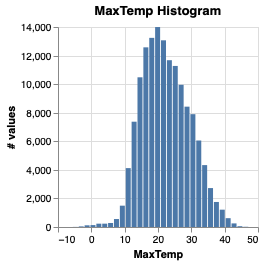

In [28]:
%chart x=Minvalue, y=CountOfValues, title="MaxTemp Histogram", labelx=MaxTemp, labely=# values

In [29]:
%project_engine_suspend project=demop4

Started suspend. Success: connection removed
Success: connection removed
Success: Suspending Compute Engine
